In [166]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
import datetime
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 40)

In [167]:
# Label Encoding and One-Hot Encoding Libraries
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Metrics for understanding the model's performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [168]:
movie_df = pd.read_csv('/Users/HarshitGaur/Documents/Northeastern University/MPS Analytics/ALY 6040/Quiz/Oscar_2000_2018.csv')

In [169]:
movie_df.head(5)

year                                              movie   movie_id  \
0  2001                                     Kate & Leopold  tt0035423   
1  2000                                        Chicken Run  tt0120630   
2  2005                                     Fantastic Four  tt0120667   
3  2002                                              Frida  tt0120679   
4  2001  The Lord of the Rings: The Fellowship of the Ring  tt0120737   

  certificate  duration                       genre  rate  metascore  \
0       PG-13       118      Comedy|Fantasy|Romance   6.4       44.0   
1           G        84  Animation|Adventure|Comedy   7.0       88.0   
2       PG-13       106     Action|Adventure|Family   5.7       40.0   
3           R       123     Biography|Drama|Romance   7.4       61.0   
4       PG-13       178     Adventure|Drama|Fantasy   8.8       92.0   

                                            synopsis    votes        gross  \
0  An English Duke from 1876 is inadvertedly drag...    66660   47100000.0   
1  When a cockerel apparently flies into a chicke...   144475  106790000.0   
2  A group of astronauts gain superpowers after a...   273203  154700000.0   
3  A biography of artist Frida Kahlo, who channel...    63852   25780000.0   
4  A meek Hobbit from the Shire and eight compani...  1286275  313840000.0   

  release_date  user_reviews  critic_reviews  popularity  awards_wins  \
0   2001-12-25         318.0           125.0      2363.0            1   
1   2000-06-23         361.0           186.0      2859.0            5   
2   2005-07-08        1008.0           278.0      1876.0            0   
3   2002-11-22         272.0           126.0      2508.0            2   
4   2001-12-19        5078.0           296.0       204.0           26   

   awards_nominations Oscar_Best_Picture_won Oscar_Best_Picture_nominated  \
0                   4                     No                           No   
1                  11                     No                           No   
2                   0                     No                           No   
3                  12                     No                           No   
4                  67                     No                          Yes   

  Oscar_Best_Director_won  ... Denver_Film_Critics_Society_won  \
0                      No  ...                               0   
1                      No  ...                               0   
2                      No  ...                               0   
3                      No  ...                               0   
4                      No  ...                               0   

  Denver_Film_Critics_Society_won_categories  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

  Denver_Film_Critics_Society_nominated  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

  Denver_Film_Critics_Society_nominated_categories  \
0                                              NaN   
1                                              NaN   
2                                              NaN   
3                                              NaN   
4                                              NaN   

  Boston_Society_of_Film_Critics_won  \
0                                  0   
1                                  0   
2                                  0   
3                                  0   
4                                  0   

  Boston_Society_of_Film_Critics_won_categories  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           N

In [170]:
movie_df.dtypes

year                                                           int64
movie                                                         object
movie_id                                                      object
certificate                                                   object
duration                                                       int64
                                                              ...   
Los_Angeles_Film_Critics_Association_nominated_categories     object
release_date.year                                            float64
release_date.month                                           float64
release_date.day-of-month                                    float64
release_date.day-of-week                                     float64
Length: 119, dtype: object

In [171]:
movie_df[movie_df['Oscar_Best_Picture_won'] == 'Yes'][['year','movie']].value_counts()

year  movie                                          
2000  Gladiator                                          1
2001  A Beautiful Mind                                   1
2016  Moonlight                                          1
2015  Spotlight                                          1
2014  Birdman or (The Unexpected Virtue of Ignorance)    1
2013  12 Years a Slave                                   1
2012  Argo                                               1
2011  The Artist                                         1
2010  The King's Speech                                  1
2008  The Hurt Locker                                    1
      Slumdog Millionaire                                1
2007  No Country for Old Men                             1
2006  The Departed                                       1
2004  Million Dollar Baby                                1
      Crash                                              1
2003  The Lord of the Rings: The Return of the King      1
20

In [172]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Columns: 119 entries, year to release_date.day-of-week
dtypes: float64(10), int64(46), object(63)
memory usage: 1.1+ MB


## Part 1: EDA

#### Q1. Scatterplot

Displaying a Scatter Plot to show the relationship between users' reviews and critics' reviews of each movie (data points) present in the data set.

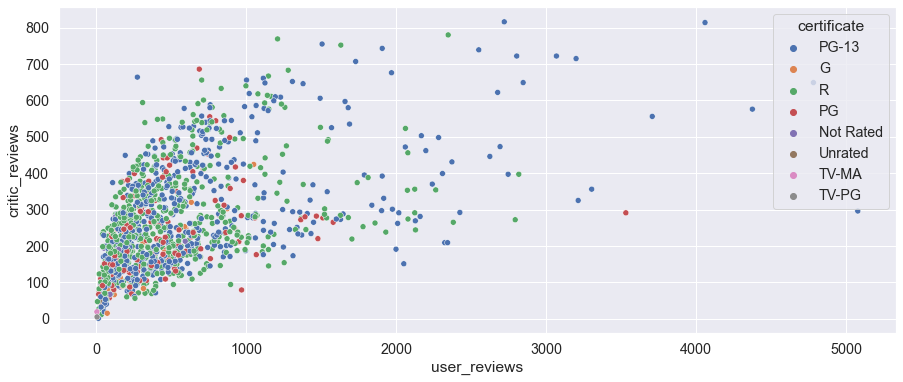

In [173]:
sns.scatterplot(data = movie_df, x = "user_reviews", y = "critic_reviews", hue = "certificate")
plt.show()

From the above plot, we can find that there is kind of a linear relationship between users' reviews and critics' reviews. 
If we distinguish this distribution on basis of "certificate" of the movies, we can find some insights that "PG-13" and "R" certified movies have recieved more reviews from both parties.

##### Pearson's Correlation Coefficient 

In [174]:
correlation = movie_df[['user_reviews', 'critic_reviews']].corr()

print("Pearson's Correlation Coefficient between Users' Reviews and Critics' Reviews :")
print(correlation.loc['user_reviews', 'critic_reviews'])

Pearson's Correlation Coefficient between Users' Reviews and Critics' Reviews :
0.4958437616066603


#### Q2. Average Duration vs. Certificate 

In [175]:
avgDuration_certificate = movie_df.groupby('certificate', as_index = False)['duration'].mean().rename(columns={'duration':'average_duration'})

In [176]:
avgDuration_certificate['average_duration'] = round(avgDuration_certificate['average_duration'], 2)
avgDuration_certificate

certificate  average_duration
0           G             93.14
1   Not Rated            105.64
2          PG            105.74
3       PG-13            119.42
4           R            117.26
5       TV-MA            111.00
6       TV-PG             40.00
7     Unrated            117.25

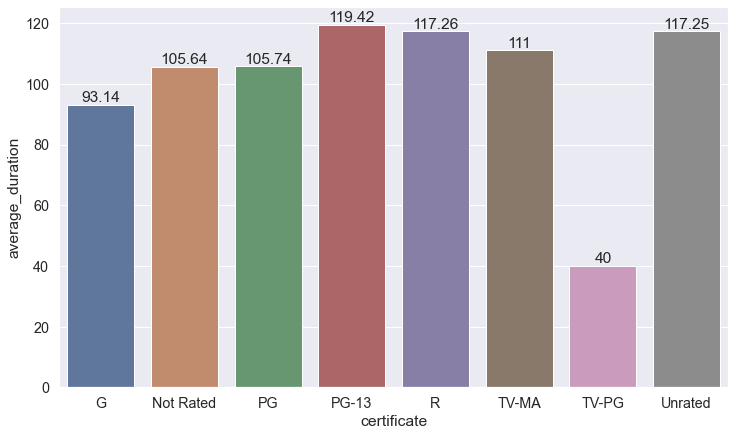

In [177]:
plt.rcParams['figure.figsize'] = [12, 7]

bar_plt = sns.barplot(data = avgDuration_certificate, x = 'certificate', y = 'average_duration',  saturation=0.60)

for i in bar_plt.containers:
    bar_plt.bar_label(i,)

The above bar plot signifies the "average duration" of movies in each of the "certificates" present in the movie industry.

We can find the below insights from the above graph:
1. 'PG-13' certified movies have the largest average duration of length with a value of around 119.42.
2. 'R' and 'Unrated' certified movies come next with average duration of about 117.26 and 117.25 respectively.
3. 'TV-PG' movies have the lowest average duration of 40 amongst all the certificates.

#### Q3. Genre split and histogram

Splitting the 'genre' column of the data set to retrieve the different genres every movie belong to.

In [178]:
genre_movie_df = pd.DataFrame(movie_df['genre'].str.split('|', expand = False).explode().value_counts())
# genre_movie_df = movie_df['genre'].str.split('|', expand = False).explode().value_counts()
# movie_df['genre'].str.split('|', expand = False).explode().value_counts()

In [179]:
genre_movie_df = genre_movie_df.reset_index()

genre_movie_df = genre_movie_df.rename(columns={'index':'genre', 'genre':'count'})
genre_movie_df

genre  count
0         Drama    694
1        Comedy    341
2     Adventure    330
3        Action    315
4       Romance    211
5         Crime    186
6      Thriller    163
7     Biography    134
8       Fantasy    126
9        Sci-Fi    125
10      Mystery     97
11    Animation     94
12       Family     84
13       Horror     77
14      History     61
15        Music     41
16          War     30
17        Sport     26
18      Musical     19
19        Short     15
20  Documentary     11
21      Western      6
22       Histor      1

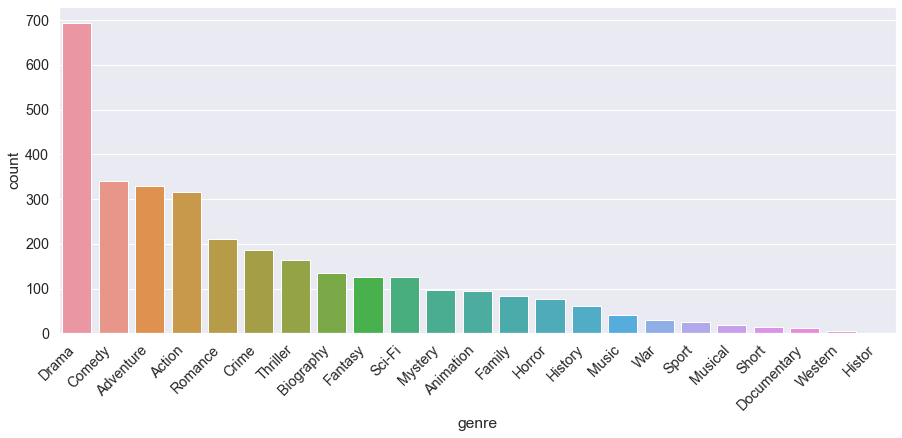

In [180]:
plt.rcParams['figure.figsize'] = [15, 6]

hist_plot = sns.barplot(data = genre_movie_df, x = 'genre', y = 'count')
hist_plot.set_xticklabels(
    hist_plot.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Plotting a histogram to check the frequency distribution of genres in the data set.
We can find the below observations from the histogram:

1. 'Drama' genre has the highest frequency at around 694 which is more than twice the frequency of 2nd largest frequency of 341 belonging to 'Comedy' genre.
2. 'Histor' has the lowest frequency of 1 only. It means only one movie in the data set belongs to 'Histor' genre.

## Part 2: Model Building

#### Q1. Removing "Oscar_Best_XXX_Won" except target variable. Keeping all except these.

In [181]:
keep_columns = [
    "year", "movie", "movie_id", "certificate", "duration", "genre", "rate", "metascore", "synopsis",
    "votes", "gross", "release_date", "user_reviews", "critic_reviews", "popularity", "awards_wins", 
    "awards_nominations", "Oscar_Best_Picture_won"
]

movie_df = movie_df[keep_columns]

In [182]:
movie_df.head(3)

year           movie   movie_id certificate  duration  \
0  2001  Kate & Leopold  tt0035423       PG-13       118   
1  2000     Chicken Run  tt0120630           G        84   
2  2005  Fantastic Four  tt0120667       PG-13       106   

                        genre  rate  metascore  \
0      Comedy|Fantasy|Romance   6.4       44.0   
1  Animation|Adventure|Comedy   7.0       88.0   
2     Action|Adventure|Family   5.7       40.0   

                                            synopsis   votes        gross  \
0  An English Duke from 1876 is inadvertedly drag...   66660   47100000.0   
1  When a cockerel apparently flies into a chicke...  144475  106790000.0   
2  A group of astronauts gain superpowers after a...  273203  154700000.0   

  release_date  user_reviews  critic_reviews  popularity  awards_wins  \
0   2001-12-25         318.0           125.0      2363.0            1   
1   2000-06-23         361.0           186.0      2859.0            5   
2   2005-07-08        1008.0           278.0      1876.0            0   

   awards_nominations Oscar_Best_Picture_won  
0                   4                     No  
1                  11                     No  
2                   0                     No

#### Q2. Convert Target Variable into Binary

In [183]:
movie_df['Oscar_Best_Picture_won'].value_counts()

No     1217
Yes      18
Name: Oscar_Best_Picture_won, dtype: int64

In [139]:
movie_df['Oscar_Best_Picture_won'] = np.where(movie_df['Oscar_Best_Picture_won'] == "Yes", 1, 0)
movie_df['Oscar_Best_Picture_won'].value_counts()

0    1217
1      18
Name: Oscar_Best_Picture_won, dtype: int64

Target Variable 'Oscar_Best_Picture_Won' has been converted with 0 and 1 values for 'No' and 'Yes' values resp.

#### Q3. Remove columns with high cardinality

In [184]:
movie_df.columns[ movie_df.nunique() / len(movie_df) > 0.70]

Index(['movie', 'movie_id', 'synopsis', 'votes', 'gross', 'popularity'], dtype='object')

In [185]:
movie_df_mod = movie_df.drop(['movie', 'movie_id', 'synopsis', 'votes', 'gross', 'popularity'], axis = 1)
movie_df_mod.head(3)

year certificate  duration                       genre  rate  metascore  \
0  2001       PG-13       118      Comedy|Fantasy|Romance   6.4       44.0   
1  2000           G        84  Animation|Adventure|Comedy   7.0       88.0   
2  2005       PG-13       106     Action|Adventure|Family   5.7       40.0   

  release_date  user_reviews  critic_reviews  awards_wins  awards_nominations  \
0   2001-12-25         318.0           125.0            1                   4   
1   2000-06-23         361.0           186.0            5                  11   
2   2005-07-08        1008.0           278.0            0                   0   

  Oscar_Best_Picture_won  
0                     No  
1                     No  
2                     No

Features with high cardianlity (more than 70%) like 'movie', 'movie_id', 'synopsis', 'votes', 'gross', 'popularity' have been removed from the data set.

#### Q4. Test-Train Split

In [186]:
movie_df_mod['release_date'] = pd.to_datetime(movie_df_mod['release_date'])

In [187]:
movie_df_mod['release_year'] = movie_df_mod['release_date'].dt.year

Release Date has been used to extract the 'Year' of the movie.

In [188]:
movie_df_mod = movie_df_mod.drop(['year', 'release_date', 'genre', 'certificate'], axis = 1)

In [189]:
movie_df_mod.head(3)

duration  rate  metascore  user_reviews  critic_reviews  awards_wins  \
0       118   6.4       44.0         318.0           125.0            1   
1        84   7.0       88.0         361.0           186.0            5   
2       106   5.7       40.0        1008.0           278.0            0   

   awards_nominations Oscar_Best_Picture_won  release_year  
0                   4                     No        2001.0  
1                  11                     No        2000.0  
2                   0                     No        2005.0

Checking NA values in the columns

In [190]:
movie_df_mod.isna().sum()

duration                   0
rate                       0
metascore                 29
user_reviews              14
critic_reviews            10
awards_wins                0
awards_nominations         0
Oscar_Best_Picture_won     0
release_year              30
dtype: int64

Dropping the NA values.

In [191]:
movie_df_mod = movie_df_mod.dropna()
movie_df_mod.isna().sum()

duration                  0
rate                      0
metascore                 0
user_reviews              0
critic_reviews            0
awards_wins               0
awards_nominations        0
Oscar_Best_Picture_won    0
release_year              0
dtype: int64

In [192]:
train = movie_df_mod[movie_df_mod['release_year'] <= 2017]
test = movie_df_mod[movie_df_mod['release_year'] > 2017]

In [193]:
X_train = train.drop(['Oscar_Best_Picture_won'], axis = 1)
Y_train = train['Oscar_Best_Picture_won']

X_test = test.drop(['Oscar_Best_Picture_won'], axis = 1)
Y_test = test['Oscar_Best_Picture_won']

#### Q5 and Q6. Tree Based Model and Prediction --> Decision Tree Classifier

Converting 'release_date' into datetime field.

In [196]:
## Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth = 5, min_samples_split = 2, random_state = 0)
clf.fit(X_train, Y_train)
test_pred_decision_tree = clf.predict(X_test)

In [197]:
#get the confusion matrix
# confusion_matrix = confusion_matrix(Y_test, test_pred_decision_tree)

#turn this into a dataframe
# matrix_df = pd.DataFrame(confusion_matrix)

In [198]:
accuracy_score(Y_test, test_pred_decision_tree)

0.9666666666666667

**Observation** - The accuracy of the training and the test set is almost similar, around 96%, indicating that the model is not over fitting.

In [201]:
labels = movie_df_mod['Oscar_Best_Picture_won']

In [202]:
#get the precision score
precision = precision_score(Y_test,
                            test_pred_decision_tree, 
                            average=None)

#turn it into a dataframe
precision_results = pd.DataFrame(precision, index=labels.unique())

#rename the results column
precision_results.rename(columns={0:'precision'}, inplace =True)
precision_results

precision
No         1.0
Yes        0.0

In [203]:
recall = recall_score(Y_test, test_pred_decision_tree, 
                              average =None)
recall_results = pd.DataFrame(recall, index= labels.unique())
recall_results.rename(columns ={0:'Recall'}, inplace =True)
recall_results

/Users/HarshitGaur/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall
No   0.966667
Yes  0.000000

In [204]:
f1 = f1_score(Y_test, test_pred_decision_tree, average=None)
f1_results = pd.DataFrame(f1, index=labels.unique())
f1_results.rename(columns={0:'f1'}, inplace=True)
f1_results

f1
No   0.983051
Yes  0.000000